 <h1 align = center> Principles of Object Oriented Programming </h1>

#### 4 principles
- Encapsulation
- Abstraction
- Inheritance
- Polymorphism


## 1 ENCAPSULATION

In encapsulation, the variables of a class can be made hidden from other classes, and can be accessed only through the methods of their current class. Therefore, it is also known as data hiding.
<br><br>
Encapsulation can be described as a protective barrier that prevents the code and data being randomly accessed by other code defined outside the class. Access to the data and code is tightly controlled by a class.

In [1]:
from datetime import timedelta, date
from IPython.display import Image
import requests
from time import sleep

generic_image = 'codeflix.png'

# talk about and add attributes you think would make sense inside of a video class
# create some class methods to interact with those attributes and change them when necessary

class Video():
    def __init__(self):
        self.title = None
        self.length = timedelta()
        self.link = generic_image
        
    def play(self):
        print(f"Now playing {self.title}")
        display(Image(self.link))

    def __repr__(self):
        return f"{self.title} is {self.length.seconds} seconds long."


In [2]:
#class Video():
 #   def __init__(self):
  #      self.title = None
  #      self.length = timedelta()
   #     self.link = generic_image
        
    #    def play(self):
     #       print(f"Now playing {self.title}")
      #      display(Image(self.link))

       # def __repr__(self):
        #    return f"{self.title} is {self.length.seconds} seconds long."
        


In [4]:
#group ideas
#class video_sub():
 #       def __init__(self):
        
  #      def pause(self):
   #         print(f"Pausing {self.tilte}")

## 2 ABSTRACTION

Abstraction is a process of hiding the implementation details from the user, only the functionality will be provided to the user. We have a bit to do before this becomes visible. But you've seen it before with presenting the user with the option to enter inputs. We then take those input and do something with them.
<br><br>


In [2]:
class Episode(Video):
    def __init__(self, data):
        Video.__init__(self)
        self.number = data['number']
        self.season = data['season']
        self.data_aired = data['airdate']
        self.summary = data['summary']
        self.rating = data['rating']['average']
        self.title = data['name']
        if data['runtime']:
            self.length = timedelta(minutes=data['runtime'])
        else:
            self.length = timedelta(minutes=30)
        if data['image']:
            self.link = data['image']['medium']
        else:
            self.link = generic_image
            
            

## 3 INHERITANCE

Inheritance can be defined as the process where one class acquires the properties (methods and fields) of another.
<br>
<i>(see above)</i>

In [3]:
class Series():
    def __init__(self):
        self.id = None
        self.network = None
        self.season = None
        self.summary = None
        self.title = None
        self.genres = []
        self.episodes = []
    
    def get_info(self, query = ''):
        data = None #<-- in case we cant find the show we are looking for
        while not data:
            if not query:
                query = input("What is the name of the series?")
                r = requests.get (f'https://api.tvmaze.com/singlesearch/shows?q={query}')
                if r.status_code == 200:
                    data = r.json()
#                    print(data)
                
                else:
                    print(f"Series error: status code {r.status_code}")
                    query = ''
            else:
                r = request.get(f'https://api.tvmaze.com/singlesearch/shows?q={query}')
                if r.status_code == 200:
                    data = r.json()
                else:
                    print(f"Series Error: status code {r.status_code}")
            
            #use Data to build  out our attributes
            self.id = data ['id']
            self.title = data['name']
#            self.network_id - data []
            self.genres = [genre for genre in data ['genres']]
            if data['network']:
                self.network = data['network']['name']
            else:
                self.network = data['webChannel']['name']
            
            #Api call for episodes    
            r = requests.get(f'https://api.tvmaze.com/shows/{self.id}/episodes')
            if r.status_code == 200:
                episodes = r.json()
            else:
                print(f"Episode Error: Status Code {r.status_code}")
            
            # setting attributes from show api call    
            #---------------------------------------
            #v setting attributes from the episode api call
            self.seasons = episodes[-1]['season']
            self.episodes = [Episode(ep) for ep in episodes]
            print(f"{self.title} has {len(self.episodes)} episodes")
            
            
    def watch(self):
        for i in range(len(self.episodes)):
            if i > 0 and i % 3 == 0:
                watching = input("Are you still watching? also get a job y/n").lower()
                if watching not in ('yes', 'y', 'yeah', 'ye', 'affirmative', 'aye aye captain'):
                    break
            self.episodes[i].play()
            sleep(self.episodes[i].length.seconds/1000)
                
    def __len__(self):
        return len(self.episodes)
    
    def __repr__(self):
        return f"Title: {self.title}"
        
        

In [8]:
first_show = Series()

first_show.get_info()

What is the name of the series?ted lasso
Ted Lasso has 34 episodes


Now playing Pilot


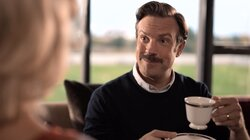

Now playing Biscuits


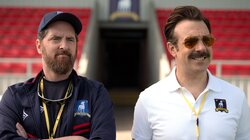

Now playing Trent Crimm: The Independent


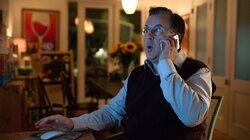

Are you still watching? also get a job y/nn


In [9]:
first_show.watch()

## 4 POLYMORPHISM

In object-oriented programming, polymorphism (from the Greek meaning “having multiple forms”) is the characteristic of being able to assign a different meaning or usage to something in different contexts — specifically, to allow an entity such as a function, or an object to have more than one form.
<br><br>


In [4]:
class User:
    id_counter = 1
    def __init__(self, username, password):
        self.username = username
        self.password = password[::-2] 
        self.id = User.id_counter
        User.id_counter += 1
        self.watch_list = []
        
    def __str__(self):
        formatted_user = f"""
        {self.id} - {self.username.title()}
        pw: {self.password}
        """
        return formatted_user
    
    def __repr__(self):
        return f"<User {self.id}  | {self.username}>"
    
    def check_password(self, password_guess):
        return self.password == password_guess[:: -2]

In [ ]:
from datetime import timedelta, date
from IPython.display import Image
import requests
from time import sleep

generic_image = 'codeflix.png'

class Theater():
    def __init__(self):
        self.users = set()
        self.current_user = None
        
    # add a user
    def add_user(self):
        username = input("Please enter a username: ")
        
        if username in {u.username for u in self.users}:
            print("User with that name already exists. Please try again!")
        else:
            password = input("Please enter your password. ")
            user = User(username, password)
            self.users.add(user)
            print(f"{user} has been created!!!")
            
        self.login_user()
        
        
    #choose a user
    def login_user(self):
        username = input("What is your username? ")
        password = input("What is your password? ")
        
        for user in self.users:
            if user.username == username and user.check_password(password):
                self.current_user = user
                print(f"{user} has logged in")
                break
                
        else:
            print("Username and/or password is incorrect!")
            self.login_user()
    def logout(self):
        self.current_user = None
        print("You have succesfully logged out!")
        
    def update_user(self):
        if self.current_user:
            print(self.current_user)
            new_user = input("Please enter the updated username or enter skip to keep your current username...")
            if new_user.lower() != "skip":
                self.current_user.username = new_user
            new_pw = input("Please enter the updated password or enter skip to skip...")
            if new_pw.lower() != 'skip':
                self.current_user.password = new_pw
            print(f"{self.current_user.username}'s info has been updated!")
                  
        else:
            print("Please login to update user info")
            self.login_user()
            
            
    #creating and using watchlist which is an attribute of the User class
    def add_to_watchlist(self, query=''):
        show = Series()
        show.get_info(query)
        
        self.current_user.watch_list.append(show)
        
        print(f"{show.title} has been added to the watchlist! ")
        
    #view watchlist
    def view_watch_list(self):
        for series in self.current_user.watch_list:
            print(f"\n\n{series} | Episodes: {len(series)}")
            print(f"\nSummary: \n {series.summary}")
            display(Image(series.episodes[0].link))
            
    def delete(self):
        print("Your current watchlist: ")
        self.view_watch_list()
        
        response = input("What would you like to remove from your watchlist? ")
        
        for series in self.current_user.watch_list:
            if series.title.title() == response.title():
                self.current_user.watch_list.remove(series)
                print(f"{response.title()} has been removed from your watch list! ")
                break
                
        else:
            print("That title is not in your watchlist!")
        
        self.view_watch_list()
        
        
    #choose from watchlist
    def choose_from_watch_list(self):
        self.view_watch_list()
        
        watch = input("What would you like to watch? ")
#         if watch.lower() in list(map(lambda x: x.title.lower(), self.current_user.watch_list)):
        for series in self.current_user.watch_list:
            if series.title.lower() == watch.lower().strip():
                print("............")
                sleep(2)
                print("............")
                series.watch()
                break
                
        else:
            response = input(f"{watch} is not in your watchlist...would you like to add it y/n>")
            if response in ('yes', 'y'):
                self.add_to_watchlist(watch)
                
                print(".............")
                sleep(2)
                print(".............")
                self.current_user.watch_list[-1].watch()
                
                
                
    # run function that gives us that sweet, sweet sauce...or spicy if thats your preference or both
    def run(self):
        """
        Method that allows users to choose a series and play episodes and other cool stuff too!
        """
        display(Image(generic_image))
        
        if self.users:
            self.login_user()
        else:
            self.add_user()
            
        print("""
        Options:
        Add - add a new user
        Login - login to your profile 
        Update - update user info
        Logout - logout of your profile
        Search - search for shows
        Watch - pick something from your watchlist
        View - view watchlist
        Delete - delete from watchlist
        Quit - close the application
        """)
        
        while True:
            response = input("What would you like to do? (add, update, login, logout, search, watch, view, delete, quit)").lower()
            
            if response== 'search':
                self.add_to_watchlist()
                
            elif response == "watch":
                self.choose_from_watch_list()
                
            elif response == 'add':
                self.add_user()
            elif response == 'logout':
                self.logout()
                new_response = input("What would you like to do next? add/login/quit").lower()
                if new_response == 'add':
                    self.add_user()
                elif new_response == 'login':
                    self.login_user()
                elif new_response == 'quit':
                    print("Thanks for watching!")
                    break
                    
            elif response == 'login':
                self.login_user()
                
            elif response == 'update':
                self.update_user()
                
            elif response == 'view':
                self.view_watch_list()
            elif response == "delete":
                self.delete()
            elif response == "quit":
                print(f"Thanks for watching, {self.current_user}! Have a nice day!")
                break
                
            else:
                print("Invalid Input: please choose from the list!")

In [12]:
codeflix = Theater()

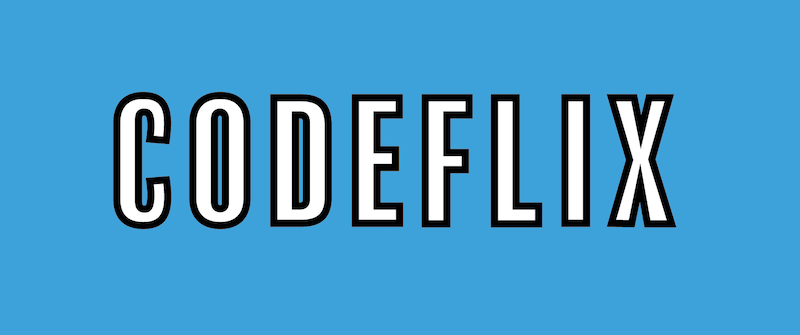

What is your username? lasala18
What is your password? steve nash
Username and/or password is incorrect!
What is your username? lasala18
What is your password? jason kidd

        1 - Lasala18
        pw: di oa
         has logged in

        Options:
        Add - add a new user
        Login - login to your profile 
        Update - update user info
        Logout - logout of your profile
        Search - search for shows
        Watch - pick something from your watchlist
        View - view watchlist
        Delete - delete from watchlist
        Quit - close the application
        
What would you like to do? (add, update, login, logout, search, watch, view, delete, quit)search
What is the name of the series?one tree hill
One Tree Hill has 187 episodes
One Tree Hill has been added to the watchlist! 
What would you like to do? (add, update, login, logout, search, watch, view, delete, quit)search
What is the name of the series?friends
Friends has 236 episodes
Friends has been added t

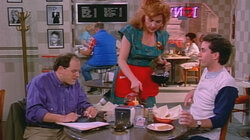



Title: One Tree Hill | Episodes: 187

Summary: 
 None


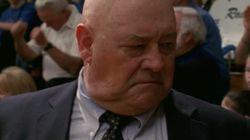



Title: Friends | Episodes: 236

Summary: 
 None


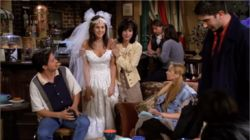

What would you like to do? (add, update, login, logout, search, watch, view, delete, quit)search
What is the name of the series?code lyoko
Code Lyoko has 95 episodes
Code Lyoko has been added to the watchlist! 
What would you like to do? (add, update, login, logout, search, watch, view, delete, quit)view


Title: Seinfeld | Episodes: 180

Summary: 
 None


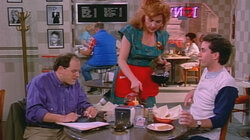



Title: One Tree Hill | Episodes: 187

Summary: 
 None


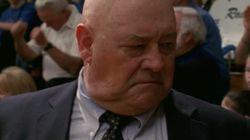



Title: Friends | Episodes: 236

Summary: 
 None


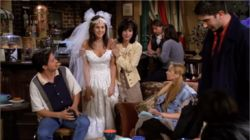



Title: Code Lyoko | Episodes: 95

Summary: 
 None


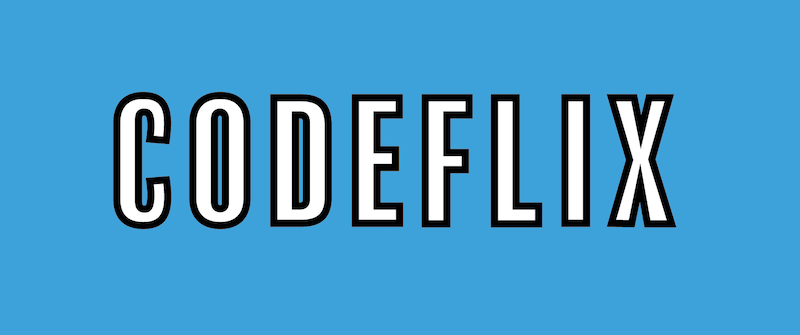

In [ ]:
codeflix.run()

##  Exercise 1:
Discuss what other classes, methods, or fields (attributes) we could make to improve our streaming service using these principles. <br> <br>
Start making a few of them and see where it leads...

In [6]:
class Picture_Setting:
    def __init__(self, backlight, brightness, color, contrast, tint, sharpness, advance_settings, back):
        self.backlight = backlight
        self.brightness = brightness
        self.color = color
        self.contrast = contrast
        self.tint = tint
        self.sharpness = sharpness
        self.advance_settings = advance_settings
        self.back = back


In [ ]:
from datetime import timedelta, date
from IPython.display import Image
import requests
from time import sleep

generic_image = 'codeflix.png'
class Controls():
       def __init__(self):
        

       def pause(self):
           print(f"Pausing {self.tilte}")
            
       def volume_increase():
            
       def volume_decrease():

In [ ]:
class video():
   def __init__(self):
       self.title = None
       self.length = timedelta()
       self.link = generic_image
       self.description = None
       self.views = 0
       self.likes = 0
        self.dislikes = 0
        self.category = None
       self.release_date = None
       self.subtitles = []